In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
red=np.array([[2,3],
              [2,4],
              [0,1],
              [3.5,4],
              [-1,3],
              [-3,3]])

In [23]:
blue=np.array([[1,-1],
               [3,0],
               [4,3],
               [1,0.7]])

In [24]:
x1,y1=red.T
z1,w1=blue.T

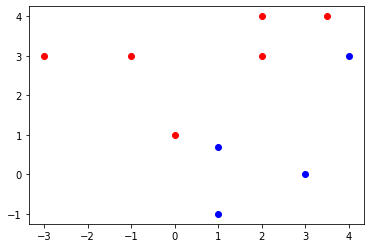

In [25]:
plt.scatter(x1,y1,color='red')
plt.scatter(z1,w1,color='blue')

In [26]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [27]:
def propagation(w,X_hat,y_hat):
    N=X_hat.shape[0]
    z=np.dot(X_hat,w)
    s=sigmoid(z)
    temp=-(y_hat*np.log(s+0.001)+(1-y_hat)*np.log(1-s+0.001))
    L= np.mean(temp,axis=0,keepdims=True)
    x1=sigmoid(z)-y_hat
    dL= 1/N*np.dot(x1.T,X_hat)
    propagate={"L":L,"dL":dL}
    return propagate

In [28]:
X=np.array([[1,2,3],
            [1,2,4],
            [1,0,1],
            [1,3.5,4],
            [1,-1,3],
            [1,-3,3],
            [1,1,-1],
            [1,3,0],
            [1,4,3],
            [1,1,0.7]])

In [29]:
y=np.array([[1],
            [1],
            [1],
            [1],
            [1],
            [1],
            [0],
            [0],
            [0],
            [0]])

In [30]:
w=np.array([[1,0.5,0.5]]).T

In [31]:
propagation(w,X,y)

{'L': array([[1.09793217]]),
 'dL': array([[0.28818948, 0.91250725, 0.12998195]])}

In [32]:
def update(b,X_hat,y_hat,eta):
    dl=propagation(b,X_hat,y_hat)["dL"].T
    return (b-eta*dl)

In [33]:
def init(m,n,method):
    if method=='zero':
        b=np.zeros((m,n))
    elif method=='random':
        b=np.random.randn(m,n)
    else:
        raise Exception('Choose correct method: zero or random')
    return b

In [34]:
def b_opt(X_hat,y_hat,eta,steps,initialization):
    N=X_hat.shape[0]
    p=X_hat.shape[1]
    b=init(p,1,initialization)
    for i in range(steps):       
        b1=update(b,X_hat,y_hat,eta)
        b=update(b1,X_hat,y_hat,eta)
        loss=propagation(b,X_hat,y_hat)["L"]
#        if i%10 == 0:
#            print ("Loss after iteration %i= %f" %(i, loss))
            
    return b


In [49]:
w=b_opt(X,y,0.001,50,'random')

In [50]:
w[1][0]

1.7398292558687563

In [51]:
def plot(w):
    x=np.arange(-3,6,0.1)
    plt.plot(x,-w[1][0]/w[2][0]*x-w[0][0]/w[2][0])
    

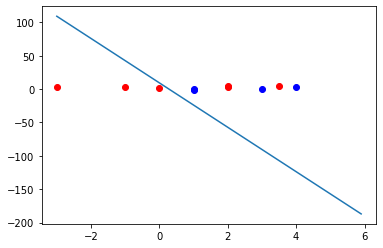

In [52]:
plt.scatter(x1,y1,color='red')
plt.scatter(z1,w1,color='blue')
plot(w)
plt.savefig("GradDesc.jpg",dpi=300)

<Figure size 432x288 with 0 Axes>